In [43]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.regression.mixed_linear_model import MixedLM
import matplotlib.pyplot as plt
from scipy import stats
from viewser.operations import fetch
from viewser import Queryset, Column
import subprocess


In [44]:
from MonthToAnnual import MonthToAnnualRegression

In [45]:
!viewser tables show ged2_cm



  > Ged2_cm
  -------------------------------------------------------
  | name                    | path                    |
  |:------------------------|:------------------------|
  | country_month_id        | country_month_id        |
  | ged_sb_best_sum_nokgi   | ged_sb_best_sum_nokgi   |
  | ged_ns_best_sum_nokgi   | ged_ns_best_sum_nokgi   |
  | ged_os_best_sum_nokgi   | ged_os_best_sum_nokgi   |
  | ged_sb_best_count_nokgi | ged_sb_best_count_nokgi |
  | ged_ns_best_count_nokgi | ged_ns_best_count_nokgi |
  | ged_os_best_count_nokgi | ged_os_best_count_nokgi |
  | ged_sb_high_sum_nokgi   | ged_sb_high_sum_nokgi   |
  | ged_ns_high_sum_nokgi   | ged_ns_high_sum_nokgi   |
  | ged_os_high_sum_nokgi   | ged_os_high_sum_nokgi   |
  | ged_sb_high_count_nokgi | ged_sb_high_count_nokgi |
  | ged_ns_high_count_nokgi | ged_ns_high_count_nokgi |
  | ged_os_high_count_nokgi | ged_os_high_count_nokgi |
  | test                    | test                    |
  
  ----------------------------

num_lags = 36

queryset = (Queryset('month_to_annual','country_month'))

queryset = queryset.with_column(
    Column('ged_sb_nolag', from_table="ged2_cm", from_column="ged_sb_best_sum_nokgi")
    .transform.missing.replace_na()
    .transform.ops.ln()
    .transform.missing.replace_na()
)
for lag in range(1, num_lags + 1):
    tlag_variable_name = f"ged_sb_tlag{lag}"
    # Apply the tlag transformation
    queryset = queryset.with_column(
        Column(tlag_variable_name, from_table="ged2_cm", from_column="ged_sb_best_sum_nokgi")
        .transform.missing.replace_na()
        .transform.ops.ln()
        .transform.temporal.tlag(lag)
        .transform.missing.replace_na()
    )

queryset = queryset.with_column(
    Column('wdi_sh_dyn_mort_fe', from_table="wdi_cy", from_column="wdi_sh_dyn_mort_fe")
    .transform.missing.fill()
    .transform.ops.ln()
    .transform.missing.replace_na()

)

queryset = queryset.with_column(
    Column('wdi_ny_gdp_mktp_kd', from_table="wdi_cy", from_column="wdi_ny_gdp_mktp_kd")
    .transform.missing.fill()
    .transform.ops.ln()
    .transform.missing.replace_na()

)

queryset = queryset.with_column(
    Column('wdi_sp_pop_totl', from_table="wdi_cy", from_column="wdi_sp_pop_totl")
    .transform.missing.fill()
    .transform.ops.ln()
    .transform.missing.replace_na()

)

queryset = queryset.with_column(
    Column('country_name', from_table="country", from_column="name")

)


    
df = queryset.publish().fetch()

In [46]:
df = Queryset("month_to_annual", "country_month").fetch()

 .    

In [47]:
df

country_name  ged_sb_nolag  wdi_sh_dyn_mort_fe  \
month_id country_id                                                          
1        1                        Guyana           0.0            4.151040   
         2                      Suriname           0.0            3.953165   
         3           Trinidad and Tobago           0.0            3.616309   
         4                     Venezuela           0.0            3.711130   
         5                         Samoa           0.0            3.718438   
...                                  ...           ...                 ...   
852      242                    Tanzania           0.0            3.793239   
         243                     Morocco           0.0            2.844909   
         244                  Mauritania           0.0            3.616309   
         245                       Sudan           0.0            3.927896   
         246                 South Sudan           0.0            4.552824   

                     wdi_ny_gdp_mktp_kd  wdi_sp_pop_totl  ged_sb_tlag1  \
month_id country_id                                                      
1        1                    21.645497        13.564709           0.0   
         2                    21.704949        12.834983           0.0   
         3                    22.994549        13.935826           0.0   
         4                     0.000000        16.537493           0.0   
         5                    19.784920        12.013131           0.0   
...                                 ...              ...           ...   
852      242                  24.884573        17.967941           0.0   
         243                  25.542467        17.428496           0.0   
         244                  22.728763        15.344817           0.0   
         245                  25.101865        17.636672           0.0   
         246                  23.207989        16.190256           0.0   

                     ged_sb_tlag2  ged_sb_tlag3  ged_sb_tlag4  ged_sb_tlag5  \
month_id country_id                                                           
1        1                    0.0           0.0           0.0           0.0   
         2                    0.0           0.0           0.0           0.0   
         3                    0.0           0.0           0.0           0.0   
         4                    0.0           0.0           0.0           0.0   
         5                    0.0           0.0           0.0           0.0   
...                           ...           ...           ...           ...   
852      242                  0.0           0.0           0.0           0.0   
         243                  0.0           0.0           0.0           0.0   
         244                  0.0           0.0           0.0           0.0   
         245                  0.0           0.0           0.0           0.0   
         246                  0.0           0.0           0.0           0.0   

                     ...  ged_sb_tlag27  ged_sb_tlag28  ged_sb_tlag29  \
month_id country_id  ...                                                
1        1           ...            0.0            0.0            0.0   
         2           ...            0.0            0.0            0.0   
         3           ...            0.0            0.0            0.0   
         4           ...            0.0            0.0            0.0   
         5           ...            0.0            0.0            0.0   
...                  ...            ...            ...            ...   
852      242         ...            0.0            0.0            0.0   
         243         ...            0.0            0.0            0.0   
         244         ...            0.0            0.0            0.0   
         245         ...            0.0            0.0            0.0   
         246         ...            0.0            0.0            0.0   

                     ged_sb_tlag30  ged_sb_tlag31  ged_sb_tlag32  \
mont

In [48]:
df.query('country_id == 28')

,,country_name,ged_sb_nolag,wdi_sh_dyn_mort_fe,wdi_ny_gdp_mktp_kd,wdi_sp_pop_totl,ged_sb_tlag1,ged_sb_tlag2,ged_sb_tlag3,ged_sb_tlag4,ged_sb_tlag5,...,ged_sb_tlag27,ged_sb_tlag28,ged_sb_tlag29,ged_sb_tlag30,ged_sb_tlag31,ged_sb_tlag32,ged_sb_tlag33,ged_sb_tlag34,ged_sb_tlag35,ged_sb_tlag36
month_id,country_id,,,,,,,,,,,,,,,,,,,,,
1,28,Colombia,0.0,3.979682,25.179415,17.080361,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,28,Colombia,0.0,3.979682,25.179415,17.080361,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28,Colombia,0.0,3.979682,25.179415,17.080361,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,28,Colombia,0.0,3.979682,25.179415,17.080361,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,28,Colombia,0.0,3.979682,25.179415,17.080361,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,28,Colombia,0.0,2.525729,26.524291,17.757414,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
849,28,Colombia,0.0,2.525729,26.524291,17.757414,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
850,28,Colombia,0.0,2.525729,26.524291,17.757414,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
j = 0
for i in range(1,247,1):
    count = MonthToAnnualRegression.countries_with_missing_data(df,i)
    if count != 852 :
        print(i, count)
        j=j+1
print('Number of countries with missing data is ',j)

15 0
27 832
35 830
36 808
44 0
51 0
56 692
57 692
59 379
61 0
63 709
65 709
68 0
71 0
72 0
75 0
83 705
84 705
86 710
88 0
91 0
92 712
95 0
98 696
102 696
103 705
106 0
110 713
111 712
113 712
114 712
115 713
117 709
122 711
123 713
124 607
125 709
126 709
131 607
134 713
137 712
140 804
141 0
144 675
152 771
153 770
163 730
170 730
175 0
176 584
182 847
184 723
185 130
186 130
187 156
188 143
189 140
190 0
191 161
192 123
193 0
194 0
195 0
196 125
197 125
200 0
201 0
202 0
203 0
204 0
207 0
208 269
209 584
210 0
211 0
212 0
215 0
216 0
217 0
219 0
221 0
224 0
225 0
226 0
227 171
228 0
229 0
230 21
231 535
232 514
233 514
236 193
238 0
239 246
240 122
241 0
242 659
245 474
246 474
Number of countries with missing data is  99


In [50]:
fixed_effect_column = 'country_id'
df[fixed_effect_column] = df.index.get_level_values(fixed_effect_column)
fixed_effect_column = 'month_id'
df[fixed_effect_column] = df.index.get_level_values(fixed_effect_column)

In [51]:
df

country_name  ged_sb_nolag  wdi_sh_dyn_mort_fe  \
month_id country_id                                                          
1        1                        Guyana           0.0            4.151040   
         2                      Suriname           0.0            3.953165   
         3           Trinidad and Tobago           0.0            3.616309   
         4                     Venezuela           0.0            3.711130   
         5                         Samoa           0.0            3.718438   
...                                  ...           ...                 ...   
852      242                    Tanzania           0.0            3.793239   
         243                     Morocco           0.0            2.844909   
         244                  Mauritania           0.0            3.616309   
         245                       Sudan           0.0            3.927896   
         246                 South Sudan           0.0            4.552824   

                     wdi_ny_gdp_mktp_kd  wdi_sp_pop_totl  ged_sb_tlag1  \
month_id country_id                                                      
1        1                    21.645497        13.564709           0.0   
         2                    21.704949        12.834983           0.0   
         3                    22.994549        13.935826           0.0   
         4                     0.000000        16.537493           0.0   
         5                    19.784920        12.013131           0.0   
...                                 ...              ...           ...   
852      242                  24.884573        17.967941           0.0   
         243                  25.542467        17.428496           0.0   
         244                  22.728763        15.344817           0.0   
         245                  25.101865        17.636672           0.0   
         246                  23.207989        16.190256           0.0   

                     ged_sb_tlag2  ged_sb_tlag3  ged_sb_tlag4  ged_sb_tlag5  \
month_id country_id                                                           
1        1                    0.0           0.0           0.0           0.0   
         2                    0.0           0.0           0.0           0.0   
         3                    0.0           0.0           0.0           0.0   
         4                    0.0           0.0           0.0           0.0   
         5                    0.0           0.0           0.0           0.0   
...                           ...           ...           ...           ...   
852      242                  0.0           0.0           0.0           0.0   
         243                  0.0           0.0           0.0           0.0   
         244                  0.0           0.0           0.0           0.0   
         245                  0.0           0.0           0.0           0.0   
         246                  0.0           0.0           0.0           0.0   

                     ...  ged_sb_tlag29  ged_sb_tlag30  ged_sb_tlag31  \
month_id country_id  ...                                                
1        1           ...            0.0            0.0            0.0   
         2           ...            0.0            0.0            0.0   
         3           ...            0.0            0.0            0.0   
         4           ...            0.0            0.0            0.0   
         5           ...            0.0            0.0            0.0   
...                  ...            ...            ...            ...   
852      242         ...            0.0            0.0            0.0   
         243         ...            0.0            0.0            0.0   
         244         ...            0.0            0.0            0.0   
         245         ...            0.0            0.0            0.0   
         246         ...            0.0            0.0            0.0   

                     ged_sb_tlag32  ged_sb_tlag33  ged_sb_tlag34  \
mont

In [52]:
# Remove countries that don't exist anymore
df = df.query('country_id!=185') # German Democratic Republic
# Remove country months that have value zero for dependent variable
df = df.query('wdi_sh_dyn_mort_fe!=0') 


In [53]:
df

country_name  ged_sb_nolag  wdi_sh_dyn_mort_fe  \
month_id country_id                                                          
1        1                        Guyana           0.0            4.151040   
         2                      Suriname           0.0            3.953165   
         3           Trinidad and Tobago           0.0            3.616309   
         4                     Venezuela           0.0            3.711130   
         5                         Samoa           0.0            3.718438   
...                                  ...           ...                 ...   
852      242                    Tanzania           0.0            3.793239   
         243                     Morocco           0.0            2.844909   
         244                  Mauritania           0.0            3.616309   
         245                       Sudan           0.0            3.927896   
         246                 South Sudan           0.0            4.552824   

                     wdi_ny_gdp_mktp_kd  wdi_sp_pop_totl  ged_sb_tlag1  \
month_id country_id                                                      
1        1                    21.645497        13.564709           0.0   
         2                    21.704949        12.834983           0.0   
         3                    22.994549        13.935826           0.0   
         4                     0.000000        16.537493           0.0   
         5                    19.784920        12.013131           0.0   
...                                 ...              ...           ...   
852      242                  24.884573        17.967941           0.0   
         243                  25.542467        17.428496           0.0   
         244                  22.728763        15.344817           0.0   
         245                  25.101865        17.636672           0.0   
         246                  23.207989        16.190256           0.0   

                     ged_sb_tlag2  ged_sb_tlag3  ged_sb_tlag4  ged_sb_tlag5  \
month_id country_id                                                           
1        1                    0.0           0.0           0.0           0.0   
         2                    0.0           0.0           0.0           0.0   
         3                    0.0           0.0           0.0           0.0   
         4                    0.0           0.0           0.0           0.0   
         5                    0.0           0.0           0.0           0.0   
...                           ...           ...           ...           ...   
852      242                  0.0           0.0           0.0           0.0   
         243                  0.0           0.0           0.0           0.0   
         244                  0.0           0.0           0.0           0.0   
         245                  0.0           0.0           0.0           0.0   
         246                  0.0           0.0           0.0           0.0   

                     ...  ged_sb_tlag29  ged_sb_tlag30  ged_sb_tlag31  \
month_id country_id  ...                                                
1        1           ...            0.0            0.0            0.0   
         2           ...            0.0            0.0            0.0   
         3           ...            0.0            0.0            0.0   
         4           ...            0.0            0.0            0.0   
         5           ...            0.0            0.0            0.0   
...                  ...            ...            ...            ...   
852      242         ...            0.0            0.0            0.0   
         243         ...            0.0            0.0            0.0   
         244         ...            0.0            0.0            0.0   
         245         ...            0.0            0.0            0.0   
         246         ...            0.0            0.0            0.0   

                     ged_sb_tlag32  ged_sb_tlag33  ged_sb_tlag34  \
mont

In [54]:
df = df.query('month_id > 240 & month_id < 450')

In [55]:
data1 = MonthToAnnualRegression(df)

In [56]:
data1.data

country_name  ged_sb_nolag  wdi_sh_dyn_mort_fe  \
month_id country_id                                                          
241      1                        Guyana      0.000000            3.732896   
         2                      Suriname      0.000000            3.349904   
         3           Trinidad and Tobago      0.000000            3.277145   
         4                     Venezuela      0.000000            2.990720   
         5                         Samoa      0.000000            3.005683   
...                                  ...           ...                 ...   
449      242                    Tanzania      0.000000            3.929863   
         243                     Morocco      0.000000            3.005683   
         244                  Mauritania      0.000000            3.747148   
         245                       Sudan      4.143135            4.053523   
         246                 South Sudan      1.609438            4.554929   

                     wdi_ny_gdp_mktp_kd  wdi_sp_pop_totl  ged_sb_tlag1  \
month_id country_id                                                      
241      1                    21.779484        13.539826      0.000000   
         2                    21.795169        13.079454      0.000000   
         3                    23.309243        14.102345      0.000000   
         4                     0.000000        17.011230      0.000000   
         5                    20.098032        12.122740      0.000000   
...                                 ...              ...           ...   
449      242                  24.713506        17.845619      0.000000   
         243                  25.482046        17.385835      0.000000   
         244                  22.615803        15.241029      0.000000   
         245                  25.206898        17.521243      3.663562   
         246                  23.207989        16.181843      4.969813   

                     ged_sb_tlag2  ged_sb_tlag3  ged_sb_tlag4  ged_sb_tlag5  \
month_id country_id                                                           
241      1               0.000000      0.000000      0.000000       0.00000   
         2               0.000000      0.000000      0.000000       0.00000   
         3               0.000000      0.000000      0.000000       0.00000   
         4               0.000000      0.000000      0.000000       0.00000   
         5               0.000000      0.000000      0.000000       0.00000   
...                           ...           ...           ...           ...   
449      242             0.000000      0.000000      0.000000       0.00000   
         243             0.000000      0.000000      0.000000       0.00000   
         244             0.000000      0.000000      0.000000       0.00000   
         245             0.000000      1.386294      2.484907       0.00000   
         246             3.178054      1.386294      3.258097       2.70805   

                     ...  ged_sb_tlag29  ged_sb_tlag30  ged_sb_tlag31  \
month_id country_id  ...                                                
241      1           ...       0.000000       0.000000       0.000000   
         2           ...       0.000000       0.000000       0.000000   
         3           ...       0.000000       0.000000       0.000000   
         4           ...       0.000000       0.000000       0.000000   
         5           ...       0.000000       0.000000       0.000000   
...                  ...            ...            ...            ...   
449      242         ...       0.000000       0.000000       0.000000   
         243         ...       0.000000       0.000000       0.000000   
         244         ...       0.000000       0.000000       0.000000   
         245         ...       3.713572       3.367296       2.944439   
         246         ...       0.000000       3.637586       1.791759   

                     ged_sb_tlag32  ged_sb_tlag33  ged_sb_tlag34  \
mont

In [57]:
independent_variable = ['wdi_ny_gdp_mktp_kd','wdi_sp_pop_totl','ged_sb_nolag','ged_sb_tlag1', 'ged_sb_tlag2', 'ged_sb_tlag3', 'ged_sb_tlag4', 'ged_sb_tlag5', 'ged_sb_tlag6', 'ged_sb_tlag7', 'ged_sb_tlag8', 'ged_sb_tlag9', 'ged_sb_tlag10', 'ged_sb_tlag11', 'ged_sb_tlag12', 'ged_sb_tlag13', 'ged_sb_tlag14', 'ged_sb_tlag15', 'ged_sb_tlag16', 'ged_sb_tlag17', 'ged_sb_tlag18', 'ged_sb_tlag19', 'ged_sb_tlag20', 'ged_sb_tlag21', 'ged_sb_tlag22', 'ged_sb_tlag23', 'ged_sb_tlag24', 'ged_sb_tlag25', 'ged_sb_tlag26', 'ged_sb_tlag27', 'ged_sb_tlag28', 'ged_sb_tlag29', 'ged_sb_tlag30', 'ged_sb_tlag31', 'ged_sb_tlag32', 'ged_sb_tlag33', 'ged_sb_tlag34', 'ged_sb_tlag35', 'ged_sb_tlag36','country_id','month_id']
dependent_variable = 'wdi_sh_dyn_mort_fe'
data1.ols_regression(independent_variable,dependent_variable,'Fixed Effect')

['wdi_ny_gdp_mktp_kd', 'wdi_sp_pop_totl', 'ged_sb_nolag', 'ged_sb_tlag1', 'ged_sb_tlag2', 'ged_sb_tlag3', 'ged_sb_tlag4', 'ged_sb_tlag5', 'ged_sb_tlag6', 'ged_sb_tlag7', 'ged_sb_tlag8', 'ged_sb_tlag9', 'ged_sb_tlag10', 'ged_sb_tlag11', 'ged_sb_tlag12', 'ged_sb_tlag13', 'ged_sb_tlag14', 'ged_sb_tlag15', 'ged_sb_tlag16', 'ged_sb_tlag17', 'ged_sb_tlag18', 'ged_sb_tlag19', 'ged_sb_tlag20', 'ged_sb_tlag21', 'ged_sb_tlag22', 'ged_sb_tlag23', 'ged_sb_tlag24', 'ged_sb_tlag25', 'ged_sb_tlag26', 'ged_sb_tlag27', 'ged_sb_tlag28', 'ged_sb_tlag29', 'ged_sb_tlag30', 'ged_sb_tlag31', 'ged_sb_tlag32', 'ged_sb_tlag33', 'ged_sb_tlag34', 'ged_sb_tlag35', 'ged_sb_tlag36', 'country_id', 'month_id', 'country_2', 'country_3', 'country_4', 'country_5', 'country_6', 'country_7', 'country_8', 'country_9', 'country_10', 'country_11', 'country_12', 'country_13', 'country_14', 'country_16', 'country_17', 'country_18', 'country_19', 'country_20', 'country_21', 'country_22', 'country_23', 'country_24', 'country_25',

In [58]:
data1.prediction(independent_variable, dependent_variable,'Fixed Effect')

['wdi_ny_gdp_mktp_kd', 'wdi_sp_pop_totl', 'ged_sb_nolag', 'ged_sb_tlag1', 'ged_sb_tlag2', 'ged_sb_tlag3', 'ged_sb_tlag4', 'ged_sb_tlag5', 'ged_sb_tlag6', 'ged_sb_tlag7', 'ged_sb_tlag8', 'ged_sb_tlag9', 'ged_sb_tlag10', 'ged_sb_tlag11', 'ged_sb_tlag12', 'ged_sb_tlag13', 'ged_sb_tlag14', 'ged_sb_tlag15', 'ged_sb_tlag16', 'ged_sb_tlag17', 'ged_sb_tlag18', 'ged_sb_tlag19', 'ged_sb_tlag20', 'ged_sb_tlag21', 'ged_sb_tlag22', 'ged_sb_tlag23', 'ged_sb_tlag24', 'ged_sb_tlag25', 'ged_sb_tlag26', 'ged_sb_tlag27', 'ged_sb_tlag28', 'ged_sb_tlag29', 'ged_sb_tlag30', 'ged_sb_tlag31', 'ged_sb_tlag32', 'ged_sb_tlag33', 'ged_sb_tlag34', 'ged_sb_tlag35', 'ged_sb_tlag36', 'country_id', 'month_id', 'country_2', 'country_3', 'country_4', 'country_5', 'country_6', 'country_7', 'country_8', 'country_9', 'country_10', 'country_11', 'country_12', 'country_13', 'country_14', 'country_16', 'country_17', 'country_18', 'country_19', 'country_20', 'country_21', 'country_22', 'country_23', 'country_24', 'country_25',

In [59]:
data1.predictions

{'Fixed Effect': month_id  country_id
 241       1             3.816507
           2             3.432974
           3             3.474678
           4             3.059510
           5             3.233333
                           ...   
 449       242           3.975578
           243           3.116224
           244           3.782081
           245           4.085653
           246           4.555395
 Length: 39185, dtype: float64}

In [60]:
data1.results

{'Fixed Effect': <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:     wdi_sh_dyn_mort_fe   R-squared:                       0.991
 Model:                            OLS   Adj. R-squared:                  0.991
 Method:                 Least Squares   F-statistic:                 1.835e+04
 Date:                Fri, 24 Nov 2023   Prob (F-statistic):               0.00
 Time:                        15:57:07   Log-Likelihood:                 34075.
 No. Observations:               39185   AIC:                        -6.768e+04
 Df Residuals:                   38951   BIC:                        -6.567e+04
 Df Model:                         233                                         
 Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------

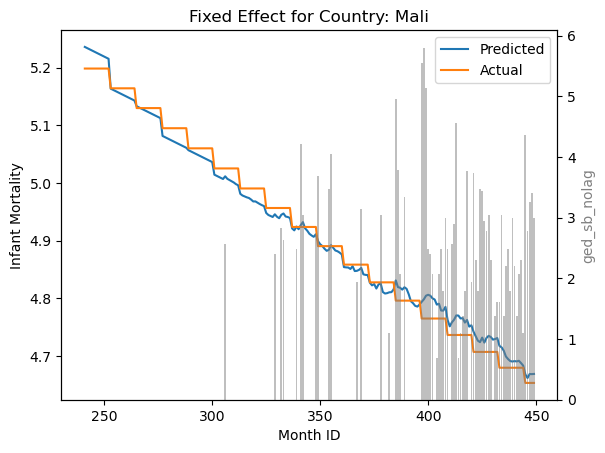

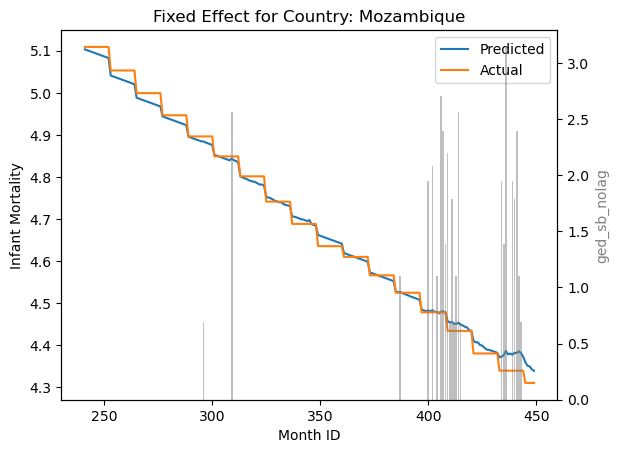

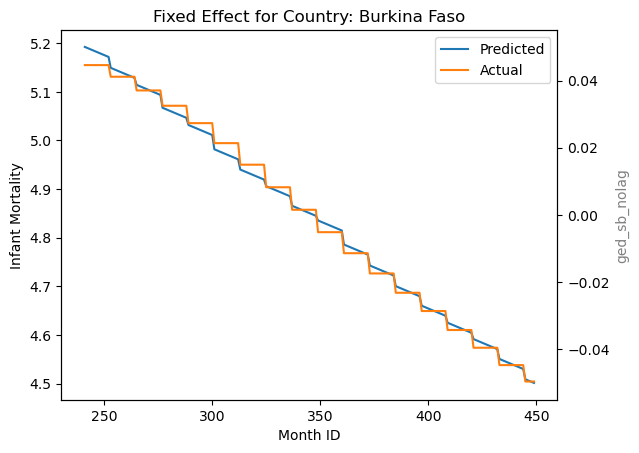

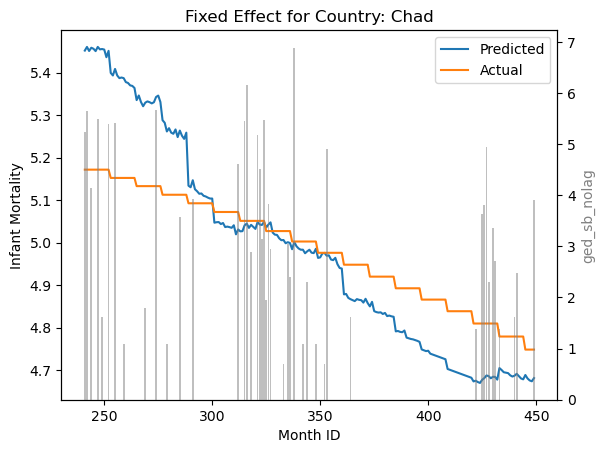

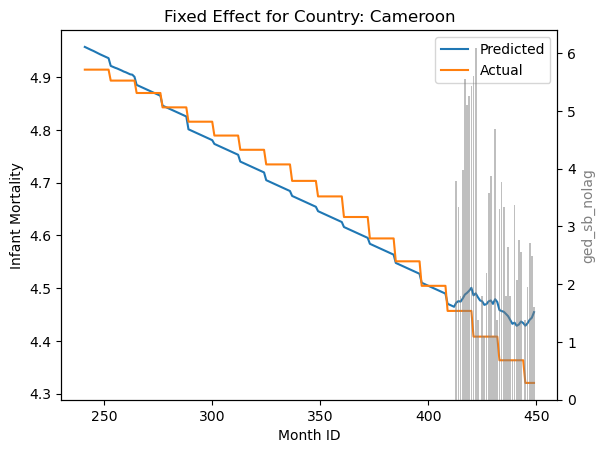

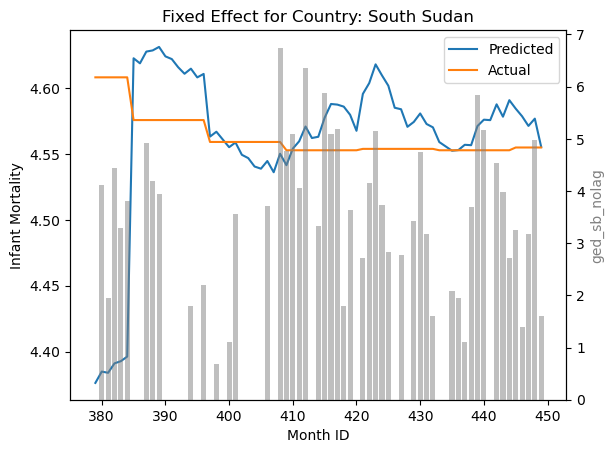

In [61]:
for country_id in [50,162,47,214,69,246]:
    data1.plot_time_series_regression(independent_variable, dependent_variable, 'Fixed Effect',country_id,'ged_sb_nolag')

In [62]:
data1.predictions

{'Fixed Effect': month_id  country_id
 241       1             3.816507
           2             3.432974
           3             3.474678
           4             3.059510
           5             3.233333
                           ...   
 449       242           3.975578
           243           3.116224
           244           3.782081
           245           4.085653
           246           4.555395
 Length: 39185, dtype: float64}

In [63]:
df_train = MonthToAnnualRegression(df.query('month_id > 240 & month_id < 450'))

In [65]:
df_train.data

country_name  ged_sb_nolag  wdi_sh_dyn_mort_fe  \
month_id country_id                                                          
241      1                        Guyana      0.000000            3.732896   
         2                      Suriname      0.000000            3.349904   
         3           Trinidad and Tobago      0.000000            3.277145   
         4                     Venezuela      0.000000            2.990720   
         5                         Samoa      0.000000            3.005683   
...                                  ...           ...                 ...   
449      242                    Tanzania      0.000000            3.929863   
         243                     Morocco      0.000000            3.005683   
         244                  Mauritania      0.000000            3.747148   
         245                       Sudan      4.143135            4.053523   
         246                 South Sudan      1.609438            4.554929   

                     wdi_ny_gdp_mktp_kd  wdi_sp_pop_totl  ged_sb_tlag1  \
month_id country_id                                                      
241      1                    21.779484        13.539826      0.000000   
         2                    21.795169        13.079454      0.000000   
         3                    23.309243        14.102345      0.000000   
         4                     0.000000        17.011230      0.000000   
         5                    20.098032        12.122740      0.000000   
...                                 ...              ...           ...   
449      242                  24.713506        17.845619      0.000000   
         243                  25.482046        17.385835      0.000000   
         244                  22.615803        15.241029      0.000000   
         245                  25.206898        17.521243      3.663562   
         246                  23.207989        16.181843      4.969813   

                     ged_sb_tlag2  ged_sb_tlag3  ged_sb_tlag4  ged_sb_tlag5  \
month_id country_id                                                           
241      1               0.000000      0.000000      0.000000       0.00000   
         2               0.000000      0.000000      0.000000       0.00000   
         3               0.000000      0.000000      0.000000       0.00000   
         4               0.000000      0.000000      0.000000       0.00000   
         5               0.000000      0.000000      0.000000       0.00000   
...                           ...           ...           ...           ...   
449      242             0.000000      0.000000      0.000000       0.00000   
         243             0.000000      0.000000      0.000000       0.00000   
         244             0.000000      0.000000      0.000000       0.00000   
         245             0.000000      1.386294      2.484907       0.00000   
         246             3.178054      1.386294      3.258097       2.70805   

                     ...  ged_sb_tlag29  ged_sb_tlag30  ged_sb_tlag31  \
month_id country_id  ...                                                
241      1           ...       0.000000       0.000000       0.000000   
         2           ...       0.000000       0.000000       0.000000   
         3           ...       0.000000       0.000000       0.000000   
         4           ...       0.000000       0.000000       0.000000   
         5           ...       0.000000       0.000000       0.000000   
...                  ...            ...            ...            ...   
449      242         ...       0.000000       0.000000       0.000000   
         243         ...       0.000000       0.000000       0.000000   
         244         ...       0.000000       0.000000       0.000000   
         245         ...       3.713572       3.367296       2.944439   
         246         ...       0.000000       3.637586       1.791759   

                     ged_sb_tlag32  ged_sb_tlag33  ged_sb_tlag34  \
mont

In [66]:
df_train.ols_regression(independent_variable,dependent_variable,'Fixed Effect')

['wdi_ny_gdp_mktp_kd', 'wdi_sp_pop_totl', 'ged_sb_nolag', 'ged_sb_tlag1', 'ged_sb_tlag2', 'ged_sb_tlag3', 'ged_sb_tlag4', 'ged_sb_tlag5', 'ged_sb_tlag6', 'ged_sb_tlag7', 'ged_sb_tlag8', 'ged_sb_tlag9', 'ged_sb_tlag10', 'ged_sb_tlag11', 'ged_sb_tlag12', 'ged_sb_tlag13', 'ged_sb_tlag14', 'ged_sb_tlag15', 'ged_sb_tlag16', 'ged_sb_tlag17', 'ged_sb_tlag18', 'ged_sb_tlag19', 'ged_sb_tlag20', 'ged_sb_tlag21', 'ged_sb_tlag22', 'ged_sb_tlag23', 'ged_sb_tlag24', 'ged_sb_tlag25', 'ged_sb_tlag26', 'ged_sb_tlag27', 'ged_sb_tlag28', 'ged_sb_tlag29', 'ged_sb_tlag30', 'ged_sb_tlag31', 'ged_sb_tlag32', 'ged_sb_tlag33', 'ged_sb_tlag34', 'ged_sb_tlag35', 'ged_sb_tlag36', 'country_id', 'month_id', 'country_2', 'country_3', 'country_4', 'country_5', 'country_6', 'country_7', 'country_8', 'country_9', 'country_10', 'country_11', 'country_12', 'country_13', 'country_14', 'country_16', 'country_17', 'country_18', 'country_19', 'country_20', 'country_21', 'country_22', 'country_23', 'country_24', 'country_25',

In [67]:
df_train.prediction(independent_variable, dependent_variable,'Fixed Effect')

['wdi_ny_gdp_mktp_kd', 'wdi_sp_pop_totl', 'ged_sb_nolag', 'ged_sb_tlag1', 'ged_sb_tlag2', 'ged_sb_tlag3', 'ged_sb_tlag4', 'ged_sb_tlag5', 'ged_sb_tlag6', 'ged_sb_tlag7', 'ged_sb_tlag8', 'ged_sb_tlag9', 'ged_sb_tlag10', 'ged_sb_tlag11', 'ged_sb_tlag12', 'ged_sb_tlag13', 'ged_sb_tlag14', 'ged_sb_tlag15', 'ged_sb_tlag16', 'ged_sb_tlag17', 'ged_sb_tlag18', 'ged_sb_tlag19', 'ged_sb_tlag20', 'ged_sb_tlag21', 'ged_sb_tlag22', 'ged_sb_tlag23', 'ged_sb_tlag24', 'ged_sb_tlag25', 'ged_sb_tlag26', 'ged_sb_tlag27', 'ged_sb_tlag28', 'ged_sb_tlag29', 'ged_sb_tlag30', 'ged_sb_tlag31', 'ged_sb_tlag32', 'ged_sb_tlag33', 'ged_sb_tlag34', 'ged_sb_tlag35', 'ged_sb_tlag36', 'country_id', 'month_id', 'country_2', 'country_3', 'country_4', 'country_5', 'country_6', 'country_7', 'country_8', 'country_9', 'country_10', 'country_11', 'country_12', 'country_13', 'country_14', 'country_16', 'country_17', 'country_18', 'country_19', 'country_20', 'country_21', 'country_22', 'country_23', 'country_24', 'country_25',

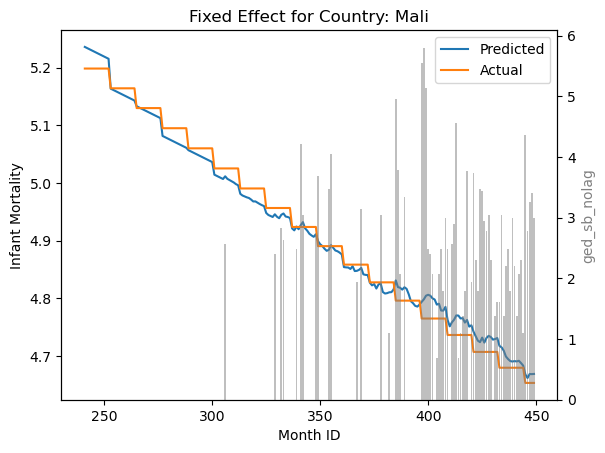

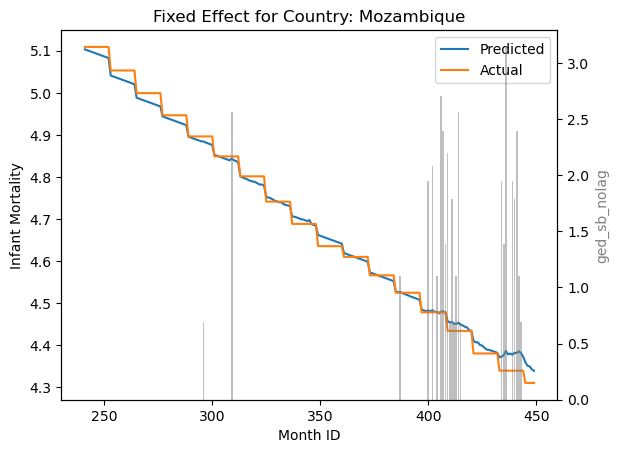

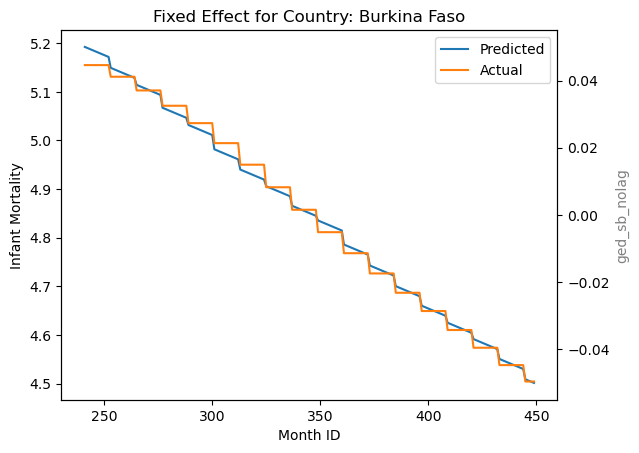

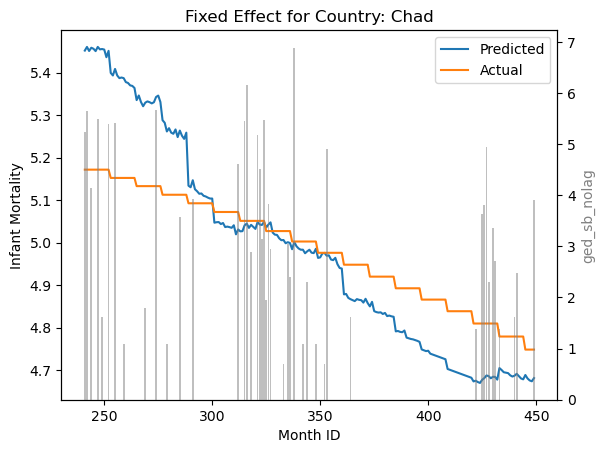

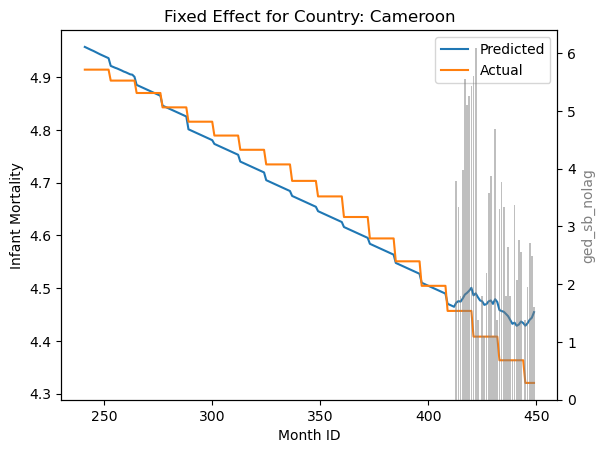

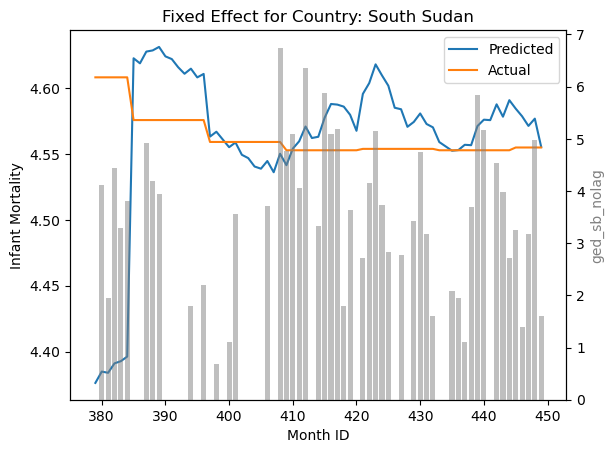

In [68]:
for country_id in [50, 162, 47, 214, 69, 246]:
    df_train.plot_time_series_regression(independent_variable, dependent_variable, 'Fixed Effect', country_id,'ged_sb_nolag')